# Entrega 2 - Proyecto 1
### Nelson Escalante - 22046

### SETUP

In [2]:
#importar pandas
import pandas as pd
import matplotlib.pyplot as plt

#convertir los datos de movies.csv en un dataframe para trabajar
path = "../movies.csv"
moviesdf = pd.read_csv(path, encoding='latin_1')
moviesdf

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,920081,0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100,False,...,16.662,2021-11-26,6.8,108,2,1,1,10,2,4
9996,920143,0,Comedy,NaN,Caracol Televisión|Dago García Producciones,CO|CO,Colombia,0.0,97,False,...,491.706,2021-12-25,1.5,2,1,2,1,8,1,1
9997,922017,0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112,False,...,565.658,2021-12-17,6.1,30,1,1,17,1,0,922017
9998,922162,0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59,False,...,9.664,2021-12-17,6.0,1,1,0,0,0,922162,The Witcher: Fireplace


## Seccion 1 - Clustering

### Ejercicio 1: Haga el preprocesamiento del dataset, explique que variables no aportan informacion a la generacion de grupos y por que.

In [3]:
#Mostrar las columnas para evaluar las variables
moviesdf.columns

Index(['id', 'budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount'],
      dtype='object')

Las variables que no aportan valor son:
- id: Solo sirve para trabajar con los datos, no tiene relacion con las peliculas.
- homePage: Es solo la pagina de una pelicula, no influye con su popularidad.
- video: Solamente nos dice si cuenta con un video promocional o no.
- actorsCharacter: Es informacion que solo sirve en la trama de la pelicula, y no se traslada al mundo real.
- originalTitle y title: No podemos realizar analisis en base a los titulos de las peliculas.

## Ejercicio 2: Analice la tendencia al agrupamiento usando el estadistico de Hopkings y la VAT.

In [5]:
from sklearn.preprocessing import StandardScaler

#Enlistar las columnas que no aportan valor para el clustering
useless = ['id', 'homePage', 'video', 'actorsCharacter', 'originalTitle', 'title']

#Enlistar las variables numericas
quant = ['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'actorsAmount']

#Eliminar dichas columnas
proc_movies = moviesdf.drop(columns=useless)
proc_movies = proc_movies.dropna()

#Normalizar las variables cuantitativas
scaler = StandardScaler()
proc_movies[quant] = scaler.fit_transform(proc_movies[quant])

proc_movies

,budget,genres,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,director,actors,actorsPopularity,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,-0.445547,Crime|Comedy,Miramax|A Band Apart,US|US,United States of America,-0.382643,-0.186524,Allison Anders|Alexandre Rockwell|Robert Rodri...,Tim Roth|Jennifer Beals|Antonio Banderas|Valer...,22.225|23.519|17.816|19.893|9.027|7.147|7.769|...,...,-0.142447,1995-12-09,-0.928525,2077,2,2,1,-0.207641,15,9
1,-0.005541,Action|Thriller|Crime,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,-0.333098,0.301243,Stephen Hopkins,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|St...,9.008|6.383|10.757|18.295|11.772|14.777|9.669|...,...,-0.192320,1993-10-15,-0.038544,223,3,3,2,-0.646809,3,9
2,-0.264368,Adventure|Action|Science Fiction,Lucasfilm|20th Century Fox,US|US,United States of America,4.466153,0.748364,George Lucas,FALSE,11.881|24.542|14.434|10.651|6.888|5.811|1.432|...,...,0.207259,1977-05-25,1.852665,16598,3,2,1,3.305701,5,62
3,1.883897,Animation|Family,Pixar,US,United States of America,5.503251,-0.105230,Andrew Stanton,FALSE,9.79|8.084|8.538|33.379|11.733|11.866|8.141|12...,...,0.359440,2003-05-30,1.407675,15928,2,1,1,-0.251558,5,18
4,0.874471,Comedy|Drama|Romance,Paramount|The Steve Tisch Company,US|,United States of America,3.849882,1.601958,Robert Zemeckis,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,33.297|13.246|6.748|6.402|13.189|10.974|10.259...,...,0.024934,1994-07-06,2.186408,22045,3,2,1,2.032114,18,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,-0.549078,Comedy,Broke and Bones|Jesse Collins Entertainment|Ir...,GB||US,United Kingdom|United States of America,-0.409413,-1.731123,Josh Ruben|Jack Clough,Hugh Grant|Joe Keery|William Jackson Harper|Lu...,11.75|11.16|11.015|15.229|7.595|1.96|10.748|20...,...,-0.128078,2021-12-27,-0.483534,121,1,3,2,0.495027,14,26
9991,-0.549078,Drama,Malvalanda,ES,Spain,-0.409413,-4.169962,José Manuel Carrasco,Javier Pereira|Marina Salas,0.6|10.738,...,-0.108556,2013-06-13,-5.044686,1,1,1,1,-1.217727,1,0
9992,-0.549078,Comedy|Crime,Elefantec Global|MarVista Entertainment|Partic...,|US|US,United States of America|Mexico,-0.409413,-1.040118,Alonso Iñiguez,Diana Bovio|Ricardo Polanco|Paco Rueda|Hernán ...,2.823|2.183|1.38|3.1|1.22|0.6|0.6|2.683|0.968,...,0.442183,2021-12-11,1.073932,22,2,3,2,-0.910310,4,2
9996,-0.549078,Comedy,Caracol Televisión|Dago García Producciones,CO|CO,Colombia,-0.409413,-0.227172,Rodrigo Triana,Amparo Grisales|Jhon Álex Toro|Chichila Navia|...,1.55|0.84|0.6|0.6|0.6|0.6|0.6|0.6,...,1.938496,2021-12-25,-5.600924,2,1,2,1,-0.954226,1,1


Estadístico de Hopkins: 0.970
Los datos parecen estar distribuidos uniformemente


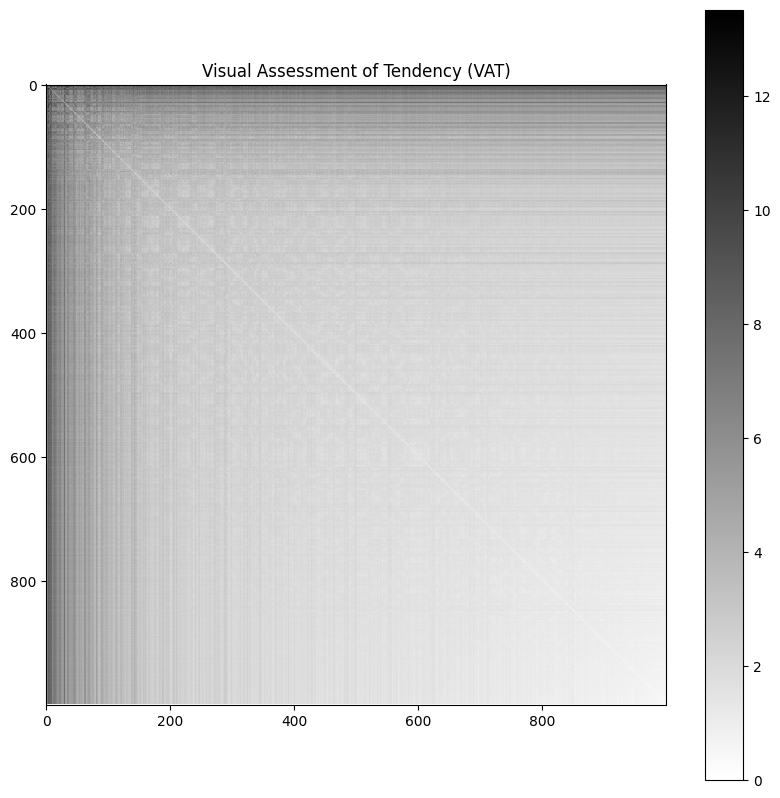

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

def hopkins_statistic(X):
    """
    Calcula el estadístico de Hopkins para determinar la tendencia al agrupamiento.
    H cercano a 0.5 sugiere datos aleatorios
    H cercano a 0 sugiere datos altamente agrupables
    """
    n_samples = X.shape[0]
    n_features = X.shape[1]
    
    # Generar muestra aleatoria del espacio de datos
    n_points = int(0.1 * n_samples)  # Usar 10% de los puntos
    
    # Muestra aleatoria de los datos reales
    real_indices = np.random.choice(range(n_samples), n_points, replace=False)
    real_points = X[real_indices]
    
    # Generar puntos aleatorios uniformes en el mismo rango
    min_vals = X.min(axis=0)
    max_vals = X.max(axis=0)
    uniform_points = np.random.uniform(min_vals, max_vals, (n_points, n_features))
    
    # Calcular distancias
    real_min_dists = []
    unif_min_dists = []
    
    X_remaining = np.delete(X, real_indices, axis=0)
    
    for point in real_points:
        dists = cdist([point], X_remaining)
        real_min_dists.append(dists.min())
    
    for point in uniform_points:
        dists = cdist([point], X)
        unif_min_dists.append(dists.min())
    
    real_min_dists = np.array(real_min_dists)
    unif_min_dists = np.array(unif_min_dists)
    
    # Calcular estadístico de Hopkins
    h = np.sum(unif_min_dists) / (np.sum(real_min_dists) + np.sum(unif_min_dists))
    
    return h

def calculate_vat(data, max_samples=1000):
    """
    Calcula la matriz de distancias ordenada para el VAT (Visual Assessment of Tendency)
    """
    # Si hay demasiados datos, tomar una muestra
    if data.shape[0] > max_samples:
        indices = np.random.choice(data.shape[0], max_samples, replace=False)
        data = data[indices]
    
    # Calcular matriz de distancias
    D = cdist(data, data)
    n = D.shape[0]
    
    # Inicializar arrays
    P = np.zeros(n, dtype=int)
    I = list(range(n))
    
    # Seleccionar el primer punto
    P[0] = I[0]
    I.remove(P[0])
    
    # Ordenar los puntos
    for i in range(1, n):
        dists = D[P[i-1], I]
        idx = np.argmax(dists)
        P[i] = I[idx]
        I.remove(I[idx])
    
    # Reordenar la matriz de distancias
    ordered_D = D[P][:, P]
    
    return ordered_D

def plot_vat(ordered_D):
    """
    Visualiza la matriz VAT
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(ordered_D, cmap='gray_r')
    plt.colorbar()
    plt.title('Visual Assessment of Tendency (VAT)')
    plt.show()

def analyze_clustering_tendency(data):
    """
    Realiza el análisis completo de tendencia al agrupamiento
    """
    # Normalizar datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Calcular estadístico de Hopkins
    h = hopkins_statistic(data_scaled)
    print(f"Estadístico de Hopkins: {h:.3f}")
    
    # Interpretar Hopkins
    if h < 0.3:
        print("Los datos muestran una fuerte tendencia al agrupamiento")
    elif h > 0.7:
        print("Los datos parecen estar distribuidos uniformemente")
    else:
        print("Los datos muestran una tendencia moderada al agrupamiento")
    
    # Calcular y visualizar VAT
    ordered_D = calculate_vat(data_scaled)
    plot_vat(ordered_D)

analyze_clustering_tendency(proc_movies[quant].dropna())

El estadistico de Hopkins indica que los datos siguen una distribucion bastante uniforme, por lo que los datos pueden ser bastante aleatorios. Esto es un mal indicador para formar clusters. Ademas, el VAT tiene bloques poco definidos, lo que refuerza la idea que la agrupacion es dificl con el set de datos.

### Ejercicio 3: Determine el numero de grupos a formar.

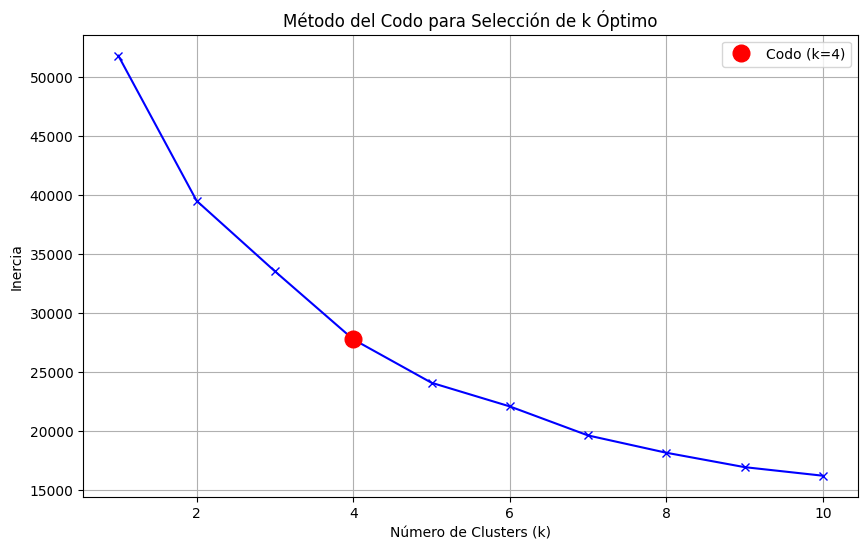


Resultados del análisis:
Número óptimo de clusters (k): 4
Varianza explicada con 4 clusters: -462420.53%

Nota: La varianza explicada es relativamente baja, lo que sugiere que los clusters podrían no ser muy cohesivos.


In [12]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

def plot_elbow_method(data, max_clusters=10):
    """
    Implementa el método del codo para determinar el número óptimo de clusters
    
    Parameters:
    -----------
    data : array-like
        Datos normalizados para clustering
    max_clusters : int
        Número máximo de clusters a evaluar
    
    Returns:
    --------
    optimal_k : int
        Número óptimo de clusters según el método del codo
    """
    
    # Calcular inercia para diferentes valores de k
    inertias = []
    K = range(1, max_clusters + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    # Crear gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para Selección de k Óptimo')
    
    # Encontrar el codo usando KneeLocator
    kl = KneeLocator(K, inertias, curve='convex', direction='decreasing')
    optimal_k = kl.elbow
    
    # Marcar el punto de codo
    if optimal_k:
        plt.plot(optimal_k, inertias[optimal_k-1], 'ro', markersize=12, 
                label=f'Codo (k={optimal_k})')
        plt.legend()
    
    plt.grid(True)
    plt.show()
    
    return optimal_k

def calculate_explained_variance_ratio(data, k):
    """
    Calcula el ratio de varianza explicada para un número dado de clusters
    """
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    
    # Calcular varianza total
    total_variance = np.sum(np.var(data, axis=0))
    
    # Calcular varianza dentro de los clusters
    within_cluster_variance = kmeans.inertia_
    
    # Calcular ratio de varianza explicada
    explained_variance_ratio = 1 - (within_cluster_variance / total_variance)
    
    return explained_variance_ratio

def analyze_optimal_clusters(data):
    """
    Realiza el análisis completo para determinar el número óptimo de clusters
    """
    # Normalizar datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Obtener k óptimo
    optimal_k = plot_elbow_method(data_scaled)
    
    if optimal_k:
        # Calcular varianza explicada para k óptimo
        explained_var = calculate_explained_variance_ratio(data_scaled, optimal_k)
        
        print(f"\nResultados del análisis:")
        print(f"Número óptimo de clusters (k): {optimal_k}")
        print(f"Varianza explicada con {optimal_k} clusters: {explained_var:.2%}")
        
        # Sugerir interpretación
        if explained_var < 0.4:
            print("\nNota: La varianza explicada es relativamente baja, lo que sugiere que los clusters podrían no ser muy cohesivos.")
        elif explained_var > 0.7:
            print("\nNota: La varianza explicada es alta, sugiriendo clusters bien definidos.")
    else:
        print("\nNo se pudo determinar automáticamente un punto de codo claro.")
        print("Considere inspeccionar visualmente la gráfica para determinar k.")

analyze_optimal_clusters(proc_movies[quant].dropna())

Al realizar nuestro grafico, se pudo observar un codo en k=4. Al ser un analisis sobre peliculas y los datos relacionados a ellas, es necesario tener una buena cantidad de grupos para nuestro analisis: ni tantos como para dificultar el encontrar patrones en los datos, ni muy pocos para hacer las relaciones encontradas triviales. Ya que los datos obtenidos al realizar el estadistico de Hopkins y el VAT nos indicaban que habia poca tendencia de de grupos naturales, lo mejor para nosotros es tener un grupo pequenio de datos.

### Ejercicio 4: Utilizar los algoritmos de k-medias y clustering jerarquico para agrupar.

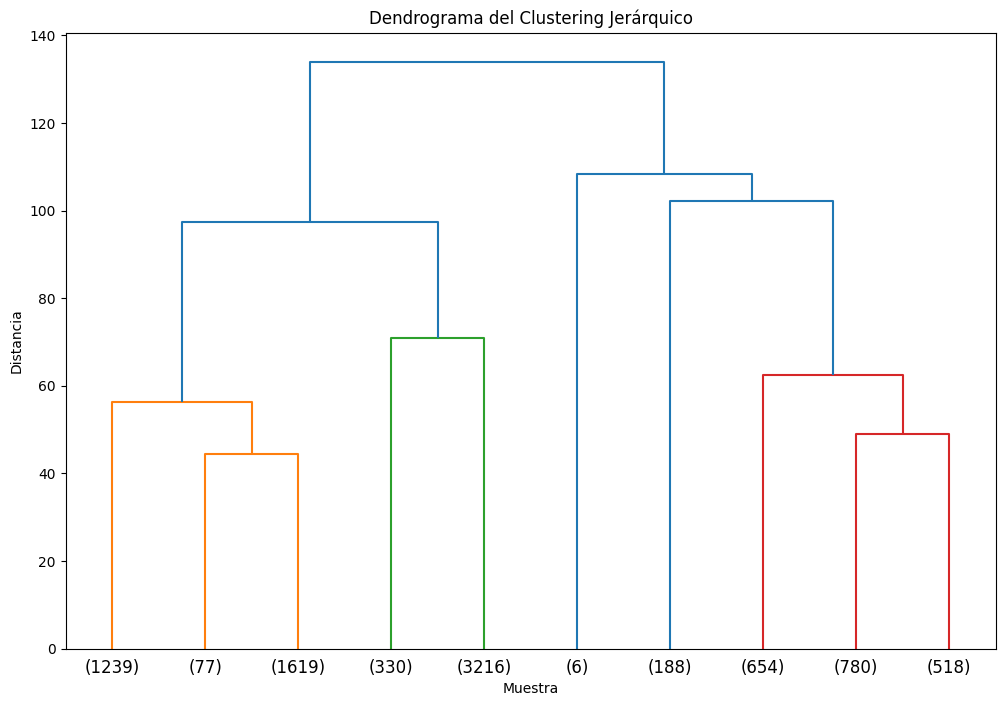

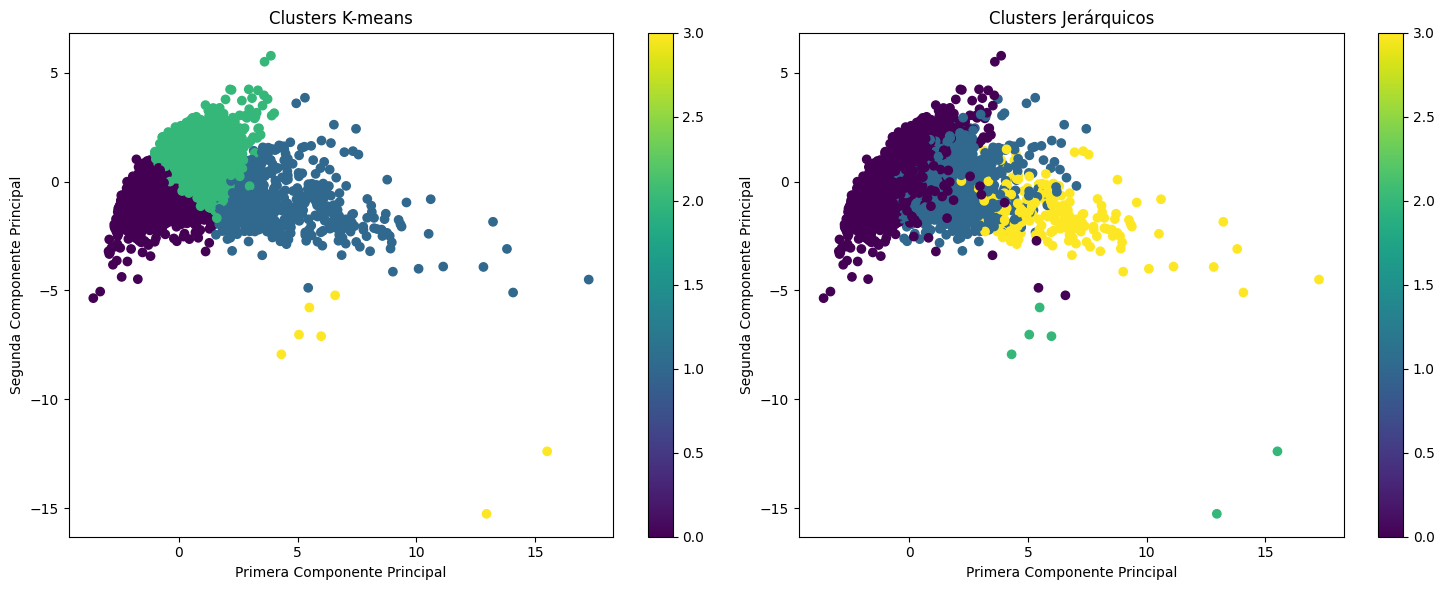


Varianza explicada por las componentes principales:
PC1: 39.88%
PC2: 18.00%
Total: 57.88%


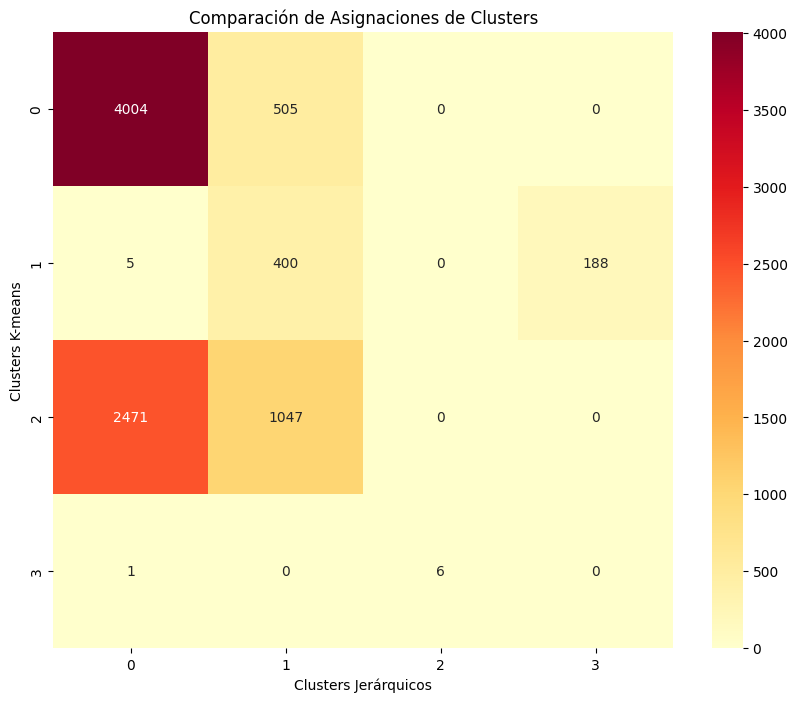


Centroides de K-means:
     budget   revenue   runtime  popularity   voteAvg  actorsAmount
0 -0.327339 -0.307588 -0.540408   -0.060722 -0.527910     -0.439477
1  2.816420  2.662383  0.788189    0.339127  0.292010      1.496448
2 -0.059442 -0.058012  0.561180   -0.037273  0.628846      0.312786
3  2.556848  2.135984  1.027089   29.153863  1.089824      0.300539


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

def apply_kmeans(data, n_clusters):
    """
    Aplica el algoritmo K-means
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_
    
    return labels, centroids, kmeans

def apply_hierarchical(data, n_clusters):
    """
    Aplica el algoritmo de clustering jerárquico
    """
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(data)
    
    return labels, hierarchical

def plot_dendrogram(data, max_d=None):
    """
    Visualiza el dendrograma del clustering jerárquico
    """
    plt.figure(figsize=(12, 8))
    
    # Crear linkage matrix
    linkage_matrix = linkage(data, method='ward')
    
    # Plotear dendrograma
    dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
    
    if max_d:
        plt.axhline(y=max_d, c='k', ls='--')
    
    plt.title('Dendrograma del Clustering Jerárquico')
    plt.xlabel('Muestra')
    plt.ylabel('Distancia')
    plt.show()

def plot_clusters_2d(data, kmeans_labels, hierarchical_labels, feature_names):
    """
    Visualiza los clusters usando PCA para reducir a 2 dimensiones
    """
    # Aplicar PCA
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    
    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot K-means
    scatter1 = ax1.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_labels, cmap='viridis')
    ax1.set_title('Clusters K-means')
    ax1.set_xlabel('Primera Componente Principal')
    ax1.set_ylabel('Segunda Componente Principal')
    plt.colorbar(scatter1, ax=ax1)
    
    # Plot Clustering Jerárquico
    scatter2 = ax2.scatter(data_2d[:, 0], data_2d[:, 1], c=hierarchical_labels, cmap='viridis')
    ax2.set_title('Clusters Jerárquicos')
    ax2.set_xlabel('Primera Componente Principal')
    ax2.set_ylabel('Segunda Componente Principal')
    plt.colorbar(scatter2, ax=ax2)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar varianza explicada por las componentes principales
    var_ratio = pca.explained_variance_ratio_
    print(f"\nVarianza explicada por las componentes principales:")
    print(f"PC1: {var_ratio[0]:.2%}")
    print(f"PC2: {var_ratio[1]:.2%}")
    print(f"Total: {sum(var_ratio):.2%}")

def compare_cluster_assignments(kmeans_labels, hierarchical_labels):
    """
    Compara las asignaciones de clusters entre ambos métodos
    """
    # Crear tabla de contingencia
    contingency = pd.crosstab(kmeans_labels, hierarchical_labels)
    
    # Visualizar tabla de contingencia como heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(contingency, annot=True, cmap='YlOrRd', fmt='d')
    plt.title('Comparación de Asignaciones de Clusters')
    plt.xlabel('Clusters Jerárquicos')
    plt.ylabel('Clusters K-means')
    plt.show()
    
    return contingency

def analyze_clusters(data, feature_names, n_clusters):
    """
    Realiza el análisis completo de clustering
    """
    # Normalizar datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Aplicar K-means
    kmeans_labels, kmeans_centroids, kmeans_model = apply_kmeans(data_scaled, n_clusters)
    
    # Aplicar Clustering Jerárquico
    hierarchical_labels, hierarchical_model = apply_hierarchical(data_scaled, n_clusters)
    
    # Visualizar dendrograma
    plot_dendrogram(data_scaled)
    
    # Visualizar clusters en 2D
    plot_clusters_2d(data_scaled, kmeans_labels, hierarchical_labels, feature_names)
    
    # Comparar asignaciones
    contingency = compare_cluster_assignments(kmeans_labels, hierarchical_labels)
    
    # Analizar centroides de K-means
    centroids_df = pd.DataFrame(
        kmeans_centroids, 
        columns=feature_names
    )
    
    print("\nCentroides de K-means:")
    print(centroids_df)
    
    return kmeans_labels, hierarchical_labels, centroids_df

kmeans_labels, hierarchical_labels, centroids = analyze_clusters(
    proc_movies[quant].dropna(), 
    quant, 
    4
)